In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random as r
import copy
import math
from math import pow
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from pprint import pprint
sns.set_style("whitegrid")

In [14]:
df = pd.read_csv('air_bnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [15]:
# describe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
id                                22552 non-null int64
name                              22493 non-null object
host_id                           22552 non-null int64
host_name                         22526 non-null object
neighbourhood_group               22552 non-null object
neighbourhood                     22552 non-null object
latitude                          22552 non-null float64
longitude                         22552 non-null float64
room_type                         22552 non-null object
price                             22552 non-null int64
minimum_nights                    22552 non-null int64
number_of_reviews                 22552 non-null int64
last_review                       18644 non-null object
reviews_per_month                 18638 non-null float64
calculated_host_listings_count    22552 non-null int64
availability_365                  22552 non-null int64

In [16]:
# describe numerical data
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [17]:
# describe categorical data
df.describe(include=['O'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,22493,22526,22552,22552,22552,18644
unique,21873,5997,12,136,3,1312
top,Berlin Wohnung,Anna,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,Private room,2018-11-04
freq,14,216,5497,1325,11534,618


[Text(0.5, 0, 'id'),
 Text(1.5, 0, 'host_id'),
 Text(2.5, 0, 'latitude'),
 Text(3.5, 0, 'longitude'),
 Text(4.5, 0, 'price'),
 Text(5.5, 0, 'minimum_nights'),
 Text(6.5, 0, 'number_of_reviews'),
 Text(7.5, 0, 'reviews_per_month'),
 Text(8.5, 0, 'calculated_host_listings_count'),
 Text(9.5, 0, 'availability_365')]

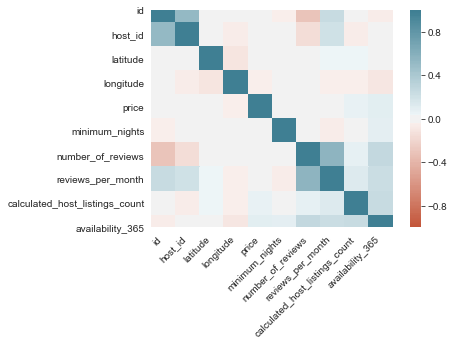

In [18]:
# plot correlation matrix of numerical variables
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)


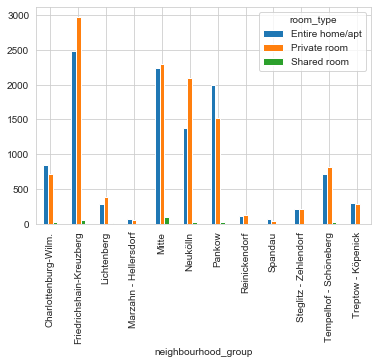

In [19]:
# plot correlation between neighbourhood and room type
pd.crosstab(df['neighbourhood_group'], df['room_type']).plot(kind='bar')

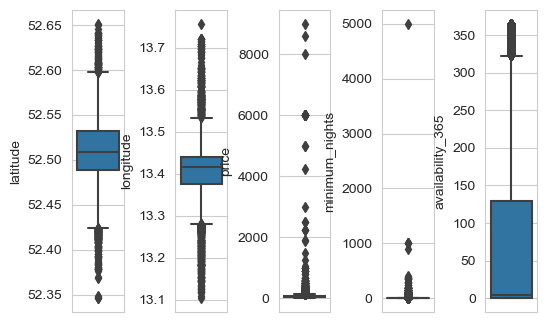

In [20]:
# plot outliers using box plot
plt.rcParams['figure.dpi'] = 100
f, axes = plt.subplots(1, 5)
sns.boxplot(y=df["latitude"], ax=axes[0])
sns.boxplot(y=df["longitude"], ax=axes[1])
sns.boxplot(y=df["price"], ax=axes[2])
sns.boxplot(y=df["minimum_nights"], ax=axes[3])
sns.boxplot(y=df["availability_365"], ax=axes[4])
plt.subplots_adjust(wspace=1)

In [21]:
# display rows where price is 0
df.loc[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
12621,18612697,Double room and kangaroos in Berlin,49435601,Svenja,Tempelhof - Schöneberg,Marienfelde,52.420357,13.366275,Private room,0,1,26,2018-10-07,1.43,1,124
14241,20218037,Your Room in a large Apartment Potsdamer Platz,83835882,Andi Und Maria,Mitte,Regierungsviertel,52.510657,13.379387,Private room,0,1,70,2018-10-25,5.11,3,10
14351,20317884,Beautiful apartment in Prenzlauer Berg,23943422,Stephan,Pankow,Prenzlauer Berg Süd,52.536574,13.429483,Entire home/apt,0,2,1,2017-09-04,0.07,3,0
14398,20382969,Bright and cosy private room in Friedrichshain,34385521,René,Friedrichshain-Kreuzberg,Frankfurter Allee Nord,52.521407,13.453777,Private room,0,4,1,2017-08-22,0.07,2,0
14469,20448073,*Nice and central room + own balcony in Kreuzb...,81030660,Isabell,Friedrichshain-Kreuzberg,Tempelhofer Vorstadt,52.490157,13.376745,Private room,0,1,0,NaN,NaN,3,0
14742,20671210,Modernes Superior Apartment in ruhiger Lage,1210739,TRIO Apartment Hotel,Marzahn - Hellersdorf,Marzahn-Süd,52.518930,13.525894,Entire home/apt,0,3,3,2018-09-25,0.67,17,343
14795,20717658,S12 Sonntagstraße Prenzlauer Berg,127309004,Kim,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.505838,13.465071,Entire home/apt,0,3,4,2018-07-27,0.32,4,230
15310,21154484,One bedroom in a cosy flat in the heart of Berlin,10246791,Jeanne,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.509413,13.460555,Private room,0,3,0,NaN,NaN,1,0


In [22]:
# remove data where price is 0
df = df.loc[df['price'] != 0]
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


In [23]:
# diplay data where minimum_nights is more than 365
df.loc[df['minimum_nights'] > 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1103,1272110,2-story-Altbau-Apt with balcony,6923567,Ron,Pankow,Prenzlauer Berg Süd,52.536511,13.431470,Entire home/apt,75,1000,9,2017-06-03,0.14,4,364
4344,6704144,Spacious room near Volkspark,13498367,Veit,Pankow,Prenzlauer Berg Ost,52.534847,13.444050,Private room,19,1000,3,2015-09-07,0.07,1,365
5490,7906287,Kre16,41690629,Stefan,Mitte,Moabit West,52.525305,13.339079,Entire home/apt,255,5000,4,2015-11-10,0.10,2,358
6693,9712293,Sunny bedroom in a top floor flat,4280465,Claire,Neukölln,Rixdorf,52.481925,13.443956,Private room,20,400,1,2018-01-17,0.10,2,40
9935,14854190,Authentic Berlin Apartment in Neukölln,32742290,Sofia,Neukölln,Rixdorf,52.483082,13.444083,Private room,25,1000,4,2016-10-27,0.15,1,364
11163,16681341,Zentrales WG-Zimmer frei ab mitte Juli,110406088,Patrick,Mitte,Brunnenstr. Süd,52.535015,13.379075,Private room,30,1000,1,2017-03-20,0.05,1,88
14399,20384770,"Spacious, bright flat with rainbows and plants",37539335,Svarta,Neukölln,Neuköllner Mitte/Zentrum,52.476575,13.437908,Entire home/apt,100,390,8,2018-02-01,0.63,1,362
18930,25005668,Ruhige Lage 4 O.G was für Sportler,189032240,Manuell,Marzahn - Hellersdorf,Hellersdorf-Ost,52.533579,13.621155,Entire home/apt,50,900,2,2018-05-14,0.34,1,90


In [24]:
# remove data where minimum_nights is more than 365 days
df.loc[df['minimum_nights'] <= 365]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22547,29856708,Cozy Apartment right in the center of Berlin,87555909,Ulisses,Mitte,Brunnenstr. Süd,52.533865,13.400731,Entire home/apt,60,2,0,NaN,NaN,1,314
22548,29857108,Altbau/ Schöneberger Kiez / Schlafsofa,67537363,Jörg,Tempelhof - Schöneberg,Schöneberg-Nord,52.496211,13.341738,Shared room,20,1,0,NaN,NaN,6,78
22549,29864272,Artists loft with garden in the center of Berlin,3146923,Martin,Pankow,Prenzlauer Berg Südwest,52.531800,13.411999,Entire home/apt,85,3,0,NaN,NaN,2,15
22550,29866805,Room for two with private shower / WC,36961901,Arte Luise,Mitte,Alexanderplatz,52.520802,13.378688,Private room,99,1,0,NaN,NaN,3,6


## Clustering

In [129]:
# Set feature for clustering
df_cluster = df[["room_type", "price"]]
df_cluster

,room_type,price
0,Entire home/apt,60
1,Private room,17
2,Entire home/apt,90
3,Private room,26
4,Private room,42
...,...,...
22547,Entire home/apt,60
22548,Shared room,20
22549,Entire home/apt,85
22550,Private room,99


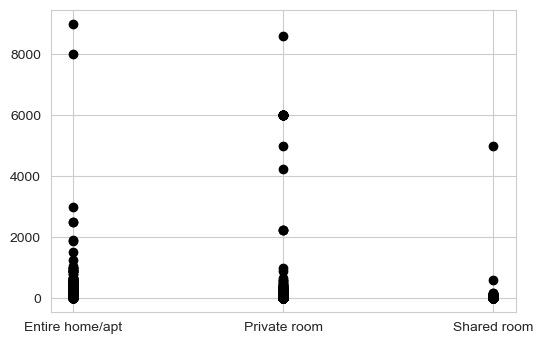

In [130]:
# plot features before feature engineering
plt.scatter(df_cluster.iloc[:,0],df_cluster.iloc[:,1], c='black')

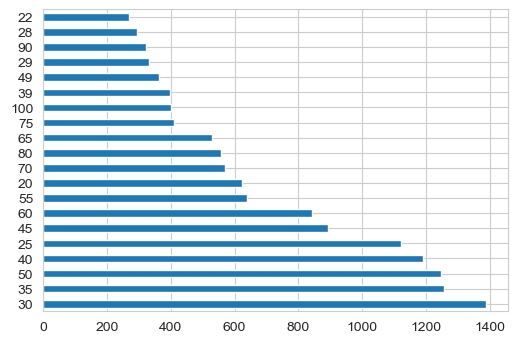

In [131]:
# plot distribution of value counts on 20 most common price
df_cluster['price'].value_counts()[:20].plot(kind='barh')

In [132]:
# divide the price column into 3 value 
df_cluster.loc[df_cluster['price'] <= 30, 'price'] = 0
df_cluster.loc[(df_cluster['price'] > 30) & (df_cluster['price'] < 60), 'price'] = 1
df_cluster.loc[(df_cluster['price'] >= 60), 'price'] = 2

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

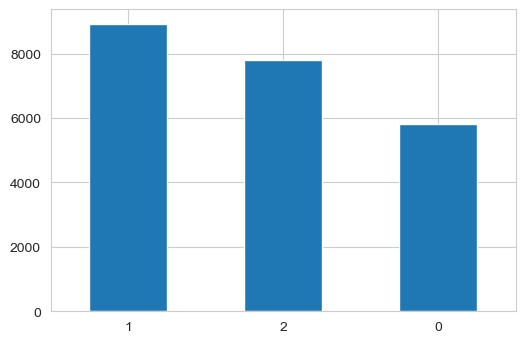

In [133]:
df_cluster['price'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [134]:
# display value counts of room type
df_cluster["room_type"].value_counts()

Private room       11529
Entire home/apt    10719
Shared room          296
Name: room_type, dtype: int64

In [135]:
# Encode categorical variable
room_type = {"room_type": {"Shared room" : 0, "Private room": 1, "Entire home/apt": 2}}
df_cluster.replace(room_type, inplace=True)
df_cluster

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,room_type,price
0,2,2
1,1,0
2,2,2
3,1,0
4,1,1
...,...,...
22547,2,2
22548,0,0
22549,2,2
22550,1,2


In [136]:
# Change dataframe to array
X = df_cluster.values
X

array([[2, 2],
       [1, 0],
       [2, 2],
       ...,
       [2, 2],
       [1, 2],
       [1, 1]], dtype=int64)

In [137]:
# Standardize the data to have a mean of ~0 and a variance of 1
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[ 1.02557238,  1.18188664],
       [-0.88190256, -1.40809658],
       [ 1.02557238,  1.18188664],
       ...,
       [ 1.02557238,  1.18188664],
       [-0.88190256,  1.18188664],
       [-0.88190256, -0.11310497]])

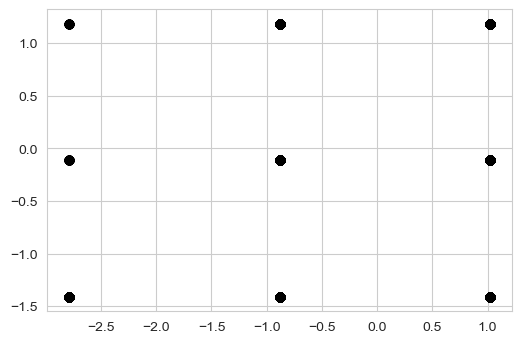

In [138]:
# Plot data as scatter plot
plt.scatter(X[:,0], X[:,1], c='black')

In [139]:
# count euclidean distance between object and centroid
def euclidean_distance(x,center):
    return math.sqrt(sum([(a-b) **2 for a,b in zip(x, center)]))

In [140]:
# Apply K-Means Clustering to dataset
def KMeans(K):
    curr_centroid = [[0 for x in range(len(X[0]))] for y in range(K)]
    # Random K points from dataset
    for i in range(K):
        idx = r.randint(0,22551)
        for j in range(len(X[idx])):
            curr_centroid[i][j] = X[idx][j]
    
    prev_centroid = [None]
    while (prev_centroid != curr_centroid):    
        cluster = [0 for x in range(K)]
        c_result = [0 for x in range(len(X))]
        sum_c = [[0 for x in range(len(X[0]))] for y in range(K)]
        i_c = [0 for x in range(K)]

        temp = copy.deepcopy(prev_centroid)
        for i in range(len(X)):

            for j in range(K):
                cluster[j] = euclidean_distance(X[i], curr_centroid[j]) #find euclidean distance between object and centroid
            c_result[i] = cluster.index(min(cluster)) # get cluster result

            for j in range(K):
                if (c_result[i] == j):
                    i_c[j] += 1
                    for k in range(len(X[0])): 
                        sum_c[j][k] += X[i][k] # sum every object cluster result according to cluster result

        prev_centroid = copy.deepcopy(curr_centroid) # update previous centroid

        for j in range(K):
            if (i_c[j] != 0):
                for k in range(len(X[0])):
                    curr_centroid[j][k] = sum_c[j][k]/i_c[j] # update new centroid
    dist = [] 
    for i in range(len(X)):
        for j in range(K):
            if (c_result[i] == j):
                dist.append(euclidean_distance(X[i], curr_centroid[j])) # find euclidean distance between object and the last centroid 
    return c_result, dist, curr_centroid

In [141]:
# Count Sum of Squared Error (SSE)
SSE = []
for num_K in range(1,11): #count SSE for k=1 to k=11
    print("K = ", num_K)
    result, dist, centroids = KMeans(num_K)
    SSE.append(sum(pow(i, 2) for i in dist))
    print("SSE = ", SSE[num_K-1],"\n")

K =  1
SSE =  45087.999999998356 

K =  2
SSE =  41243.5524007829 

K =  3
SSE =  8819.499485396847 

K =  4
SSE =  7822.5917500418245 

K =  5
SSE =  5992.1418200706 

K =  6
SSE =  2028.233826459811 

K =  7
SSE =  3686.8527021442196 

K =  8
SSE =  1010.9972200021267 

K =  9
SSE =  1010.9972200021267 

K =  10
SSE =  198.83905029065932 



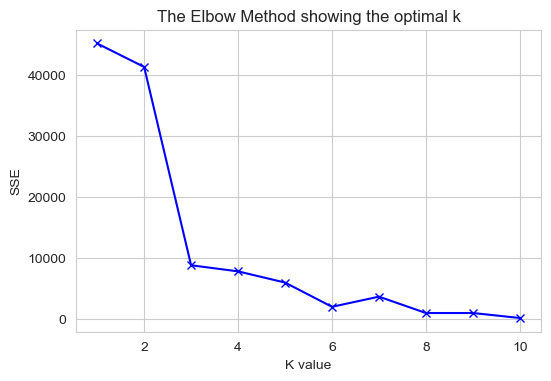

In [142]:
# plot SSE results of k=1 to k=10
K = range(1,11)
plt.rcParams['figure.dpi'] = 100
plt.plot(K, SSE, 'bx-')
plt.xlabel('K value')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [143]:
# find elbow from the SSE values
def findMinimum(SSE):
    delta = []
    for i in range(len(SSE)-1):
        delta.append(SSE[i]-SSE[i+1])
    return (delta.index(max(delta))+2)
idx = findMinimum(SSE)
print("Maximum K : ", idx)

# Apply maximum k to cluster dataset using k-means clustering
result, dist, centroid = KMeans(idx)

Maximum K :  3


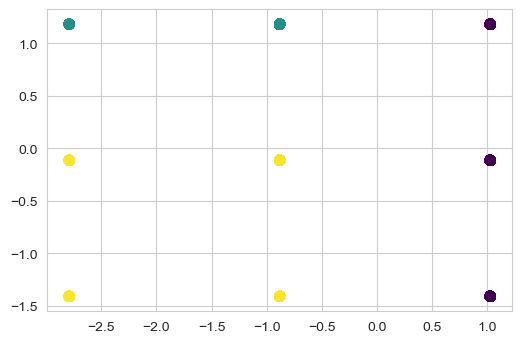

In [144]:
# Plot clustering result
plt.scatter(X[:, 0], X[:, 1], c=result,
            s=50, cmap='viridis')

In [145]:
# Evaluate model using calinski-harabasz index
print("Calinski-harabasz index = %.3f" % metrics.calinski_harabasz_score(X, result))

Calinski-harabasz index = 31985.240


In [146]:
df_cluster.to_csv('dataset_clustering_model_1.csv')

## Classification

In [147]:
data_train = df[["price", "minimum_nights", "latitude", "longitude", "room_type"]]
data_train

,price,minimum_nights,latitude,longitude,room_type
0,60,4,52.534537,13.402557,Entire home/apt
1,17,2,52.548513,13.404553,Private room
2,90,62,52.534996,13.417579,Entire home/apt
3,26,5,52.498855,13.349065,Private room
4,42,2,52.543157,13.415091,Private room
...,...,...,...,...,...
22547,60,2,52.533865,13.400731,Entire home/apt
22548,20,1,52.496211,13.341738,Shared room
22549,85,3,52.531800,13.411999,Entire home/apt
22550,99,1,52.520802,13.378688,Private room


In [148]:
data_test = df[['neighbourhood_group']]
data_test

,neighbourhood_group
0,Mitte
1,Pankow
2,Pankow
3,Tempelhof - Schöneberg
4,Pankow
...,...
22547,Mitte
22548,Tempelhof - Schöneberg
22549,Pankow
22550,Mitte


In [149]:
# Encode categorical ordinal label
room_type = {"room_type": {"Shared room" : 0, "Private room": 1, "Entire home/apt": 2}}
data_train.replace(room_type, inplace=True)
data_train

C:\Anaconda\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,price,minimum_nights,latitude,longitude,room_type
0,60,4,52.534537,13.402557,2
1,17,2,52.548513,13.404553,1
2,90,62,52.534996,13.417579,2
3,26,5,52.498855,13.349065,1
4,42,2,52.543157,13.415091,1
...,...,...,...,...,...
22547,60,2,52.533865,13.400731,2
22548,20,1,52.496211,13.341738,0
22549,85,3,52.531800,13.411999,2
22550,99,1,52.520802,13.378688,1


In [150]:
# concate data train and data test
dataset = pd.concat([data_train, data_test.reindex(data_train.index)], axis=1)

In [151]:
# get values of data train
X = data_train.values
X

array([[60.        ,  4.        , 52.53453732, 13.40255693,  2.        ],
       [17.        ,  2.        , 52.54851279, 13.40455283,  1.        ],
       [90.        , 62.        , 52.53499619, 13.41757867,  2.        ],
       ...,
       [85.        ,  3.        , 52.53179977, 13.41199948,  2.        ],
       [99.        ,  1.        , 52.52080183, 13.37868779,  1.        ],
       [45.        ,  5.        , 52.47376159, 13.42444719,  1.        ]])

In [152]:
# Standardize the data to have a mean of ~0 and a variance of 1
X = StandardScaler().fit_transform(X)
X

array([[-0.03253563, -0.07766662,  0.80168495, -0.06108848,  1.02557238],
       [-0.22772687, -0.12684138,  1.25508761, -0.02665409, -0.88190256],
       [ 0.1036443 ,  1.34840127,  0.81657193,  0.19807499,  1.02557238],
       ...,
       [ 0.08094765, -0.102254  ,  0.71287107,  0.10181976,  1.02557238],
       [ 0.14449828, -0.15142875,  0.35606779, -0.47289214, -0.88190256],
       [-0.1006256 , -0.05307924, -1.17004687,  0.31657466, -0.88190256]])

In [153]:
# get values of data train
y = data_test.values

In [154]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [155]:
# Set KNN as classifier and display current parameter
classifier =KNeighborsClassifier()
print('Parameters currently in use in {}:\n'.format('K-Nearest Neighbor'))
pprint(classifier.get_params())

Parameters currently in use in K-Nearest Neighbor:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [156]:
# Set hyperparameter for random search
random_grid = {'n_neighbors': [int(x) for x in np.linspace(start= 5, stop = 15, num = 10)],
                   'weights': ['uniform', 'distance'],
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'leaf_size' : [30,40,50,60],
                   'p' : [1,2],
                   'metric' : ['euclidean', ',manhattan', 'minkowski','chebyshev']
              }
pprint(random_grid)

{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [30, 40, 50, 60],
 'metric': ['euclidean', ',manhattan', 'minkowski', 'chebyshev'],
 'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15],
 'p': [1, 2],
 'weights': ['uniform', 'distance']}


In [157]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConvers

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [30, 40, 50, 60],
                                        'metric': ['euclidean', ',manhattan',
                                                   'minkowski', 'chebyshev'],
                                        'n_neighbors': [5, 6, 7, 8, 9, 10, 11,
                

In [158]:
# Display best hyperparameter from random search
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'metric': 'minkowski', 'leaf_size': 40, 'algorithm': 'auto'}

The mean accuracy of a model with these hyperparameters is:
0.967293203962147


In [159]:
# Get best hyperparameter
best_classifier = random_search.best_estimator_

best_classifier

KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [160]:
# fit best estimator to data train
best_classifier.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=40, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                     weights='distance')

In [161]:
# Predict data using classifier and parameter from best_classifier
classifier_pred = best_classifier.predict(X_test)

In [162]:
# Display aqccuracy score
d = {
     'Model': 'K-Nearest Neighbor',
     'Training Set Accuracy': round(accuracy_score(y_train, best_classifier.predict(X_train)),2)*100,
     'Test Set Accuracy': round(accuracy_score(y_test, classifier_pred),2)*100
}

df_models = pd.DataFrame(d, index=[0])
df_models

,Model,Training Set Accuracy,Test Set Accuracy
0,K-Nearest Neighbor,100.0,97.0


In [163]:
dataset.to_csv('dataset_classification_model_1.csv', index=False)